# Stress: Stress Distribution in a Bar

This example demonstrates how to compute **normal, shear, and bending stresses** along a beam using the `BarStressDistribution` class.  

We consider a **simply supported beam** with:

- One **fixed node**  
- One **vertically restrained node**  

The beam is subjected to a **constant line load**, and we evaluate the stress distribution along the bar at **10 discrete points**.  

The example prints:

- Normal stresses $\sigma(x)$  
- Shear stresses $\tau(x)$  
- Bending stresses $\sigma_{b,\text{top}}(x)$ and $\sigma_{b,\text{bottom}}(x)$  

Additionally, stresses are evaluated at a **specific cross-section height** $z$.


You can find the example as an executable Python file [here](https://github.com/i4s-htwk/sStatics/blob/main/sstatics/examples/05_stress/09_stress_distribution.py).

## Import Modules
We start by importing the required classes for defining the Stress object.

In [1]:
from sstatics.core.preprocessing import (
    Bar, System, Material, Node, NodePointLoad, CrossSection, BarLineLoad
)
from sstatics.core.preprocessing.geometry import Polygon
from sstatics.core.calc_methods import FirstOrder

## Create First-Order Analysis
We create an instance of `FirstOrder`, to perform a linear structural analysis:

In [2]:
# 1. Define Material
mat = Material(210_000_000, 81_000_000, 0.1, 0.1)

# 2. Define Cross-section (rectangle 10 × 40)
rect = Polygon(points=[(0, 0), (10, 0), (10, 40), (0, 40), (0, 0)])
cs = CrossSection(geometry=[rect])

# 3. Define System: single-span beam (4 m)
n1 = Node(0, 0, u='fixed', w='fixed')
n2 = Node(4, 0, w='fixed', loads=(NodePointLoad(x=1)))

line_load = BarLineLoad(1, 1)
b1 = Bar(n1, n2, cs, mat, line_loads=line_load)
system = System([b1])

# 4. Solve system
solution = FirstOrder(system)

## Stress Distribution Along the Beam

We evaluate the stress at 10 points along the bar:

In [3]:
n_disc = 10
stress_list = solution.stress_distribution(n_disc=n_disc)

The output includes:

- Normal stress: $\sigma(x)$
- Shear stress: $\tau(x)$
- Bending stress at bottom fiber: $\sigma_{b,\text{bottom}}(x)$
- Bending stress at top fiber: $\sigma_{b,\text{top}}(x)$

In [4]:
for i, bar_stress in enumerate(stress_list):
    sigma = bar_stress.stress_disc
    print(f"\nBar {i}: Stress distribution at {n_disc+1} points")
    print("  σ_normal(x): \n", sigma[:, 0])
    print("  τ_shear(x): \n", sigma[:, 1])
    print("  σ_bending_bottom(x): \n", sigma[:, 2])
    print("  σ_bending_top(x): \n", sigma[:, 3])


Bar 0: Stress distribution at 11 points
  σ_normal(x): 
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
 0.0025]
  τ_shear(x): 
 [ 7.50000000e-03  6.00000000e-03  4.50000000e-03  3.00000000e-03
  1.50000000e-03 -8.32667268e-19 -1.50000000e-03 -3.00000000e-03
 -4.50000000e-03 -6.00000000e-03 -7.50000000e-03]
  σ_bending_bottom(x): 
 [ 8.32667268e-20 -2.70000000e-04 -4.80000000e-04 -6.30000000e-04
 -7.20000000e-04 -7.50000000e-04 -7.20000000e-04 -6.30000000e-04
 -4.80000000e-04 -2.70000000e-04  3.33066907e-19]
  σ_bending_top(x): 
 [-8.32667268e-20  2.70000000e-04  4.80000000e-04  6.30000000e-04
  7.20000000e-04  7.50000000e-04  7.20000000e-04  6.30000000e-04
  4.80000000e-04  2.70000000e-04 -3.33066907e-19]


### Stress at a Specific Cross-Section Height

We can also evaluate stresses at a specific height $z$ of the cross-section (e.g., $z=0$):

In [5]:
z = 0

print(f"\nStress evaluation at z = {z}:")

for i, bar_stress in enumerate(stress_list):
    sigma_z = bar_stress.stress_at_z(z)
    print(f"\nBar {i}: Stress distribution at {n_disc+1} points at height "
          f"z = {z}")
    print("  σ_normal(x): \n", sigma_z[:, 0])
    print("  τ_shear(x): \n", sigma_z[:, 1])
    print("  σ_bending(x): \n", sigma_z[:, 2])


Stress evaluation at z = 0:

Bar 0: Stress distribution at 11 points at height z = 0
  σ_normal(x): 
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
 0.0025]
  τ_shear(x): 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  σ_bending(x): 
 [ 8.32667268e-20 -2.70000000e-04 -4.80000000e-04 -6.30000000e-04
 -7.20000000e-04 -7.50000000e-04 -7.20000000e-04 -6.30000000e-04
 -4.80000000e-04 -2.70000000e-04  3.33066907e-19]


### Plot Normal Stress

Finally, we can plot the normal stress distribution along the beam. This provides a visual representation of the stress along the beam, making it easy to interpret the effect of the line load on the structure.

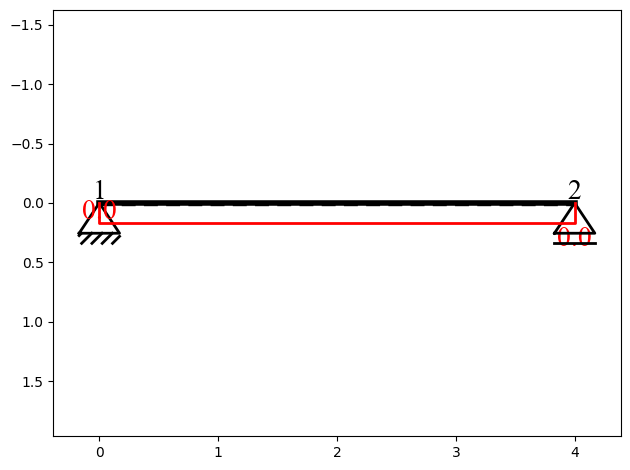

In [6]:
solution.plot_stress('normal')